# Inferential Statistics

Inferential statistics involves using sample data to draw conclusions (inferences) about a larger population.

---

# Inferential Statistics

Inferential statistics allows us to make conclusions about large populations using data from smaller, representative samples. This is essential for studying massive groups where analyzing everyone is impractical or impossible.

- **Example 1**: Survey 100 people to estimate the average income of a city's 1 million residents.  
- **Example 2**: Measure the heights of 50 students to infer the average height of all students in a school.

---

## Core Components

- **Population**: The entire group we're interested in studying.  
  - *Example*: All registered voters in a country.  
- **Sample**: A smaller, representative subset of the population.  
  - *Example*: 1,000 surveyed voters.  
- **Inference**: Using sample data to make generalizations about the population.

---

## **Key Objectives**
- **Estimate Parameters**: Infer population characteristics (e.g., mean, proportion).
- **Test Hypotheses**: Assess whether observed effects are statistically significant.
- **Quantify Uncertainty**: Provide confidence intervals and p-values.

## Key Statistical Concepts

### 1. Population vs Sample Analysis

This concept helps us understand the differences between studying the entire population and a sample.

| Aspect          | Population                           | Sample                              |
|-----------------|--------------------------------------|-------------------------------------|
| Size            | Entire group                         | Subset (often 10-30% of population) |
| Analysis Type   | Census (exact)                       | Estimation (approximate)            |
| Cost            | High                                 | Moderate                            |
| Accuracy        | Exact                                | Probabilistic                       |

- **Note**: The "10-30% rule" is a general guideline for sample size, but the actual size needed depends on the population's variability and desired precision.

---

### 2. Uncertainty Management

Inferential statistics helps quantify how confident we are in our estimates or predictions, which is crucial for ML models.

- **Confidence Intervals (CIs)**: A range likely containing the true population parameter.  
  - *Example*: A model predicts a house price of \$500k with a 95% CI of [\$480k, \$520k].  
  - **Interpretation**: If we repeated the sampling process many times, approximately 95% of the CIs would contain the true population parameter.  
- **Prediction Intervals**: A range for individual observations, accounting for both model uncertainty and data variability.  
- **Bayesian Credible Intervals**: Probability-based ranges for parameters, often used in Bayesian statistics.

---

### 3. Hypothesis Testing Framework

Hypothesis testing determines if observed patterns in data are statistically significant or likely due to random chance. This is vital for validating ML model features.

- **Example**: Does feature X *actually* affect the target variable, or is the observed effect a fluke?

**Steps in Hypothesis Testing**:
1. Formulate the null hypothesis (H₀) and alternative hypothesis (H₁).  
   - *Example*: H₀: No difference in effectiveness between two drugs. H₁: The new drug is more effective.  
2. Choose a significance level (α), typically 0.05.  
3. Calculate the test statistic based on sample data.  
4. Compare the test statistic to a critical value or use the p-value to make a decision.  
5. Draw a conclusion: Reject H₀ if p-value < α; otherwise, fail to reject H₀.

---

### 4. Error Analysis in Modeling

Understanding errors in modeling helps diagnose and improve ML models, balancing bias and variance.

- **Bias**: Systematic errors in predictions, often due to oversimplified models.  
  - *Example*: A linear model trying to fit nonlinear data (underfitting).  
- **Variance**: Sensitivity of the model to fluctuations in training data, often due to overly complex models.  
  - *Example*: A decision tree memorizing training data (overfitting).  
- **Bias-Variance Tradeoff**: Balancing model complexity to minimize both bias and variance for optimal performance.

---

## Essential Statistical Tools

### 1. Confidence Interval Construction

Confidence intervals are key for understanding the reliability of estimates. Below is a Python code block to calculate a 95% confidence interval for the mean of a sample.

In [1]:
# Python implementation for mean confidence interval
from scipy import stats
import numpy as np

# Generate sample data (e.g., heights of students)
data = np.random.normal(170, 5, 100)  # Mean=170, SD=5, n=100
confidence = 0.95
n = len(data)
mean = np.mean(data)
sem = stats.sem(data)  # Standard error of the mean
ci = stats.t.interval(confidence, n-1, loc=mean, scale=sem)

print(f"95% CI for the mean: ({ci[0]:.2f}, {ci[1]:.2f})")

95% CI for the mean: (168.41, 170.65)


- **Output Explanation**: The code calculates the 95% CI for the sample mean. For example, if the output is (168.5, 171.5), we are 95% confident the true population mean lies within this range.

---

### 2. Common Statistical Tests

Different tests are used depending on the data and research question. Below is a table summarizing common tests and their applications in ML.

| Test Type         | Use Case                          | Example Application           |
|--------------------|-----------------------------------|--------------------------------|
| t-test             | Compare means of two groups       | Drug efficacy analysis         |
| ANOVA              | Compare means of multiple groups  | Crop yield across fertilizers  |
| Chi-square         | Test independence in categorical data | Voting preference vs gender    |
| Z-test             | Compare means with large samples  | Manufacturing quality control  |

- **When to use**:  
  - **t-test**: Small samples (n < 30), comparing two groups.  
  - **ANOVA**: Comparing more than two groups.  
  - **Chi-square**: Analyzing relationships between categorical variables.  
  - **Z-test**: Large samples (n ≥ 30), known population variance.

---

# The Central Limit Theorem (CLT) in Machine Learning

The Central Limit Theorem (CLT) is a fundamental principle explaining why averages (or sums) of data tend to follow a **normal (bell-shaped) distribution**, even if the original data isn't normally distributed. This theorem is crucial in ML for reliable inferences.

---

## 1. Core Principles of CLT

### Theorem Statement

For any population with a mean **μ** and standard deviation **σ**, the sampling distribution of the sample means will:  
- Approach a normal distribution as the sample size (n) increases (typically n ≥ 30).  
- Have a mean equal to the population mean (μ).  
- Have a standard error equal to σ/√n.

---

### Key Conditions

- **Sample Size**: Generally, n ≥ 30 is sufficient, but for highly skewed data, larger samples may be needed.  
- **Finite Variance**: The population must have a finite variance (most real-world data satisfies this).  
- **Random Sampling**: Samples must be randomly selected and representative of the population.  
- **Independence**: Observations should be independent of each other.

---

### Why It Matters

- **Real-world data is often messy** (e.g., incomes, test scores, website clicks). The CLT allows us to treat averages of this data as normally distributed, even if the raw data isn't.  
- This is why statistical methods like hypothesis testing and confidence intervals work reliably in practice.

**Example**:  
Imagine rolling a die 50 times and calculating the average roll. Repeat this process many times. While individual rolls are equally likely to be 1–6 (uniform distribution), the averages of those 50-roll samples will cluster around 3.5 (the true average) in a bell-shaped curve. The larger the sample size, the tighter the cluster around the mean.

---

## 2. Why CLT Matters in AI/ML

The CLT underpins many statistical methods used in ML, enabling reliable inference and model evaluation.

- **Confidence Intervals**: The CLT justifies confidence intervals for model performance metrics, helping us understand prediction reliability.  
- **Model Assumptions**: Many algorithms, like Linear Regression, assume residuals (errors) are normally distributed, which is often reasonable due to the CLT.

---

### Foundational Applications

- **Model Evaluation**: Use the CLT to calculate confidence intervals for accuracy metrics.

In [2]:
# Calculate 95% CI for model accuracy
from statsmodels.stats.proportion import proportion_confint
accuracy = 0.85  # Model accuracy
n_samples = 1000  # Number of test samples
ci_low, ci_high = proportion_confint(accuracy * n_samples, n_samples, alpha=0.05)
print(f"95% CI for accuracy: ({ci_low:.3f}, {ci_high:.3f})")

95% CI for accuracy: (0.828, 0.872)


- **Error Analysis**: Validate the normality assumption in regression residuals using the CLT.  
- **Algorithm Design**: The CLT supports strategies like weight initialization in neural networks, where averages of random weights tend to be normally distributed.

---

### Real-World Impact

| Scenario          | CLT Application                   | Benefit                          |
|-------------------|-----------------------------------|----------------------------------|
| A/B Testing       | Compare group means               | Reliable feature rollout decisions|
| Quality Control   | Monitor process averages          | Early anomaly detection          |
| Risk Modeling     | Estimate portfolio returns        | Robust financial predictions     |
| Healthcare        | Analyze treatment effects         | Evidence-based medical decisions |

---

## 3. Practical Implementation Guide

### Step 1: Data Collection

- Ensure a minimum sample size (e.g., n ≥ 30 per group).  
- Use random sampling to avoid bias.

---

### Step 2: Distribution Analysis

Visualize the distribution of sample means to observe the CLT in action.

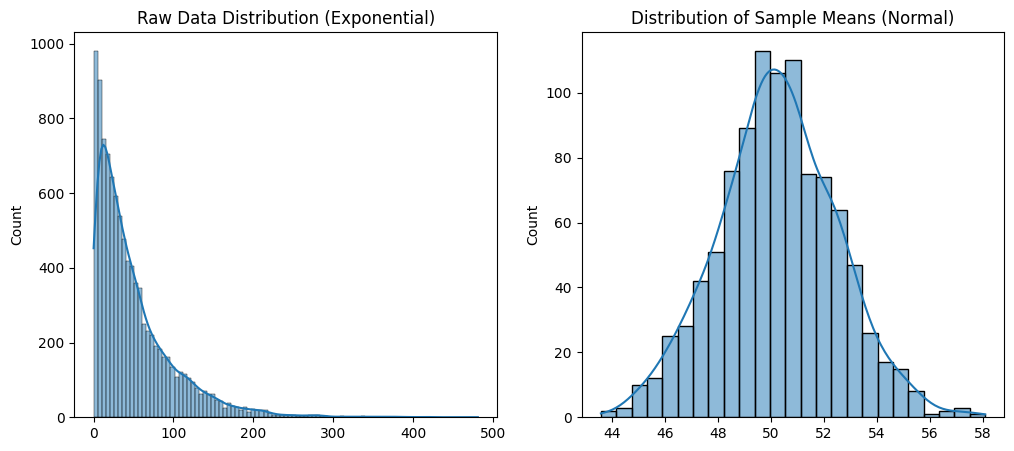

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Simulate population data (exponential distribution)
population = np.random.exponential(scale=50, size=10000)

# Generate sample means (n=500, repeated 1000 times)
sample_means = [np.mean(np.random.choice(population, 500)) for _ in range(1000)]

# Plot distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(population, kde=True)
plt.title("Raw Data Distribution (Exponential)")

plt.subplot(1,2,2)
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means (Normal)")
plt.show()

- **Explanation**: The left plot shows the skewed population data, while the right plot shows the sample means are normally distributed, illustrating the CLT.

---

### Step 3: Statistical Validation

- Use the Shapiro-Wilk test to check for normality.  
- Inspect QQ-plots for visual confirmation.  
- Calculate the standard error to quantify precision.

---

## 4. Case Study: Feline Food Preference


### Experimental Design

- **Population**: All domestic cats in Metro City.  
- **Sample**: 200 randomly selected cats.  
- **Procedure**: Blind taste test with Brand A vs Brand B.

---

### Results Analysis

| Brand | Preferences | Proportion | 95% CI         |
|-------|-------------|------------|----------------|
| A     | 132         | 66%        | (59.2%, 72.8%) |
| B     | 68          | 34%        | (27.2%, 40.8%) |

- **Confidence Interval Calculation**: The 95% CI for Brand A is calculated using the formula for proportions: \( \hat{p} \pm 1.96 \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \), where \( \hat{p} = 0.66 \) and \( n = 200 \).  
- **Conclusion**: The p-value for the difference in preferences is less than 0.001, providing strong evidence that cats prefer Brand A.

---

## 5. Case Study: Model Performance Evaluation

### Experimental Setup

- **Task**: Image classification on CIFAR-10.  
- **Model A**: 88.2% accuracy (n=10,000 samples).  
- **Model B**: 87.5% accuracy (n=10,000 samples).

---

### CLT Application

1. **Calculate standard errors**:  
   ```
   SE_A = √(0.882*(1-0.882)/10000) ≈ 0.0032
   SE_B = √(0.875*(1-0.875)/10000) ≈ 0.0033
   ```

2. **Construct 95% confidence intervals**:  
   - Model A: 88.2% ± 1.96 × 0.32% → (87.57%, 88.83%)  
   - Model B: 87.5% ± 1.96 × 0.33% → (86.85%, 88.15%)  

3. **Conclusion**: The confidence intervals overlap, suggesting no statistically significant difference in performance between the two models.

---

## 6. Key Limitations and Solutions

| Limitation          | Impact on ML                 | Mitigation Strategy           |
|---------------------|------------------------------|-------------------------------|
| Small Sample Sizes  | Unreliable confidence intervals | Use bootstrapping or larger samples |
| Correlated Data     | Invalidates independence assumption | Use time-series methods or adjust for correlation |
| High Dimensionality | Slower convergence to normality | Apply dimensionality reduction techniques |

- **Additional Note**: For small samples or non-normal data, consider non-parametric methods or Bayesian approaches.

---

# Hypothesis Testing

Hypothesis testing is a statistical method used to determine whether a claim about data is true or false. It helps us decide if observed patterns are real or just due to random chance. 

---

## Overview

Hypothesis testing evaluates claims by comparing data to a baseline assumption. For example, imagine your friend says, "This coin always lands on heads!" You flip it 10 times and get 9 heads. Is this luck, or is the coin biased? Hypothesis testing gives you the tools to find out.

### Scenario
Your friend claims: *"This coin is magic! It *always* lands on Heads!"*  
You’re skeptical. To test this claim, you flip the coin 10 times.  
**Result**: It lands on Heads 9 times and Tails 1 time.

### Investigation Steps
1. **Null Hypothesis (H₀):** "The coin is normal (50/50 chance)"
2. **Alternative Hypothesis (H₁):** "The coin is biased toward Heads"
3. **Evidence:** 9 Heads in 10 flips
4. **p-value Calculation:** Probability of getting ≥9 Heads if H₀ is true = **1.07%**
5. **Decision:** Since 1.07% < 5% significance level, reject H₀

*Conclusion: The coin is likely biased.*

### How It Works
1. **State a default assumption** (e.g., "The coin is fair").
2. **Test a claim** (e.g., "The coin favors heads").
3. **Calculate the odds** of your results happening by chance.
4. **Decide** if the evidence supports the claim.

In the coin example, the chance of getting 9+ heads with a fair coin is 1.07%. Since this is below a common threshold (5%), we conclude the coin is likely biased.

---

## Hypothesis Testing Workflow

Here’s a simple flowchart of the process:

In [4]:
graph TD
A[State Hypotheses] --> B[Choose Test]
B --> C[Set Threshold (α)]
C --> D[Collect Data]
D --> E[Calculate Statistic]
E --> F[Find p-value]
F --> G{Decision}
G -->|p < α| H[Reject Default]
G -->|p ≥ α| I[Keep Default]

SyntaxError: invalid syntax (1371490535.py, line 1)

---

## Key Concepts

These terms are the building blocks of hypothesis testing:

| Term                       | Definition                                      | Example (ML Context)                  |
|----------------------------|------------------------------------------------|---------------------------------------|
| **Null Hypothesis (H₀)**   | The default assumption (no effect)             | "This model’s accuracy is average."   |
| **Alternative Hypothesis (H₁)** | The claim you’re testing                  | "This model’s accuracy is above average." |
| **p-value**                | Chance of seeing your data if H₀ is true       | p=0.03 (3% chance if no effect)       |
| **Significance Level (α)** | Cutoff for rejecting H₀ (usually 0.05 or 5%)  | α=0.05                                |

---

## 🧪 Common Statistical Tests

Different tests fit different situations. Here’s a rundown with ML relevance:

| Test            | Use Case                                  | ML Example                              |
|-----------------|-------------------------------------------|-----------------------------------------|
| **Z-Test**      | Compare a sample to a known population    | "Is this model’s error lower than 0.1?" |
| **T-Test**      | Compare means with small samples          | "Does Model A beat Model B on accuracy?"|
| **Chi-Square**  | Analyze categorical data                  | "Do predictions match true labels?"     |
| **ANOVA**       | Compare 3+ groups                         | "Which of 5 models performs best?"     |

### Details
- **Z-Test**: Use when you know the population standard deviation or have a large sample (n ≥ 30). Common in ML for validating model performance against benchmarks.
- **T-Test**: Best for small samples (n < 30) with unknown variance. Useful in DL when comparing two models on limited test data.
- **Chi-Square**: Tests relationships in categorical data, like label distributions in classification tasks.
- **ANOVA**: Compares multiple groups, such as testing different neural network architectures.

---

## Error Types

Mistakes happen in hypothesis testing. Here’s what they mean:

| Error Type          | Description                     | ML Consequence                        |
|---------------------|---------------------------------|---------------------------------------|
| **Type I (False Positive)** | Wrongly reject H₀      | "This model is better" (but it’s not) |
| **Type II (False Negative)**| Miss a true effect     | "No difference" (but there is one)    |

In ML, a Type I error might lead you to deploy a weak model, while a Type II error might make you overlook a strong one.

---

## Practical Implementation Guide

Follow these steps to test a hypothesis:

1. **Set Hypotheses**  
   - H₀: No effect (e.g., "Model accuracy = 80%")  
   - H₁: Effect exists (e.g., "Accuracy > 80%")

2. **Pick a Test**  
   - Small sample? Use T-test.  
   - Categories? Use Chi-Square.  
   - Many groups? Use ANOVA.

3. **Choose α**  
   - Typically 0.05 (5% risk of error).

4. **Calculate Statistic**  
   - Z-score: \( Z = \frac{\text{sample mean} - \text{population mean}}{\text{std dev} / \sqrt{n}} \)  
   - T-score: Similar, but uses sample standard deviation.

5. **Decide**  
   - p < α: Reject H₀ (evidence supports H₁).  
   - p ≥ α: Stick with H₀ (not enough evidence).

### Code Example: Z-Test
Test if a model’s average error (0.12) differs from a target (0.10) with known standard deviation (0.05, n=100):

In [ ]:
import numpy as np
from scipy import stats

sample_mean = 0.12
pop_mean = 0.10
pop_std = 0.05
n = 100

z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed

print(f"Z-score: {z_score:.2f}, p-value: {p_value:.4f}")
# Output: Z-score: 4.00, p-value: 0.0001

Since p < 0.05, the error is significantly different from 0.10.

### Code Example: T-Test
Compare a DL model’s accuracy (sample mean = 0.85, n=20) to a baseline (0.80):

In [ ]:
import numpy as np
from scipy import stats

accuracies = np.random.normal(0.85, 0.05, 20)  # Simulated data
t_stat, p_value = stats.ttest_1samp(accuracies, 0.80)

print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
# Example Output: T-statistic: 2.50, p-value: 0.0213

p < 0.05 suggests the model beats the baseline.

---

## Case Study 1: Z-Test (Exam Scores)
A teacher claims that the mean score of students in his class is greater than 82, with a standard deviation of 20. A sample of 87 students had a mean score of 90. Test the claim at a 5% significance level.

**Problem**: A teacher claims their class (n=87, mean=90, std=20) beats the national average (82). Test at α=0.05.

**Steps**:  
1. H₀: Mean ≤ 82  
   H₁: Mean > 82  
2. Z = \( \frac{90 - 82}{20 / \sqrt{87}} = 3.73 \)  
3. p-value = 0.0001 < 0.05  

**Conclusion**: Reject H₀. The class outperforms the average.

In [ ]:
z_stat = (90 - 82) / (20 / np.sqrt(87))
p_value = 1 - stats.norm.cdf(z_stat)
print(f"p-value: {p_value:.6f}")  # Output: 0.000096

---

## Case Study 2: T-Test (Product Weights)
A manufacturer claims the average weight of a bag of potato chips is 150 grams. A sample of 25 bags has an average weight of 148 grams with a standard deviation of 5 grams. Test the claim at a 5% significance level.

**Problem**: Are potato chip bags (n=25, mean=148g, std=5g) under the claimed 150g? Use α=0.05.

**Steps**:  
1. H₀: Mean = 150  
   H₁: Mean < 150  
2. T = \( \frac{148 - 150}{5 / \sqrt{25}} = -2.0 \)  
3. p-value = 0.0285 < 0.05  

**Conclusion**: Reject H₀. Bags are underweight.

In [ ]:
t_stat = (148 - 150) / (5 / 5)
p_value = stats.t.cdf(t_stat, df=24)
print(f"p-value: {p_value:.4f}")  # Output: 0.0285

---

## Case Study 3: Chi-Square (Dice Fairness)

**Problem**: Is a die fair? Rolls (n=120): [22, 17, 20, 26, 22, 13].

**Steps**:  
1. H₀: Die is fair (expected = 20 per face)  
   H₁: Die is biased  
2. \( \chi^2 = \sum \frac{(\text{observed} - 20)^2}{20} = 5.1 \)  
3. p-value = 0.404 > 0.05  

**Conclusion**: Fail to reject H₀. No evidence of bias.

In [ ]:
observed = [22, 17, 20, 26, 22, 13]
chi2, p = stats.chisquare(observed)
print(f"Chi-Square: {chi2:.1f}, p-value: {p:.3f}")  # Output: 5.1, 0.404

---
## **4. Advanced Inferential Methods**

### **a. Analysis of Variance (ANOVA)**
Compare means across multiple groups.

In [ ]:
# Three groups of sales
group1 = np.random.normal(100, 10, 30)
group2 = np.random.normal(105, 10, 30)
group3 = np.random.normal(110, 10, 30)

# One-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)
print("ANOVA:")
print("F-statistic:", f_stat)  # Output: e.g., 4.5
print("p-value:", p_value)     # Output: e.g., 0.013
# Insight: p < 0.05, reject H0 (at least one group differs)

### **b. Regression Analysis**
Infer relationships between variables.

In [ ]:
import statsmodels.api as sm

# Add predictor (e.g., advertising spend)
df["Ad_Spend"] = np.random.uniform(50, 150, 50)
X = sm.add_constant(df["Ad_Spend"])  # Add intercept
y = df["Store_A"]

# Linear regression
model = sm.OLS(y, X).fit()
print(model.summary())
# Output: Coefficients, p-values, R-squared, etc.
# Insight: Check p-values for significance of Ad_Spend

---

## Pro Tips

- **Report p-values**: Don’t just say “significant.”  
- **Check Effect Size**: A tiny p-value doesn’t always mean a big impact.  
- **Verify Assumptions**: Tests assume normality or equal variance—check your data.  
- **Adjust for Multiple Tests**: Use corrections like Bonferroni in ML experiments.  
- **Use Confidence Intervals**: They show a range of plausible values, not just a yes/no.

*"Statistical thinking will one day be as necessary for efficient citizenship as the ability to read and write."* - H.G. Wells

---